# 🧬 Elastic Net vs 🌲 Random Forest Comparison

This notebook compares the two best-performing models from previous experiments:

- **Elastic Net** (regularized linear model)
- **Random Forest** (nonlinear ensemble of decision trees)

Evaluated per drug using 5-fold cross-validation with RMSE and R².


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

NUM_PCS = 20

# Load files
elastic = pd.read_csv(f"01_simple_baselines/results/elastic_net/elastic_net_results_{NUM_PCS}_pcs.csv").assign(Model="ElasticNet")
rf = pd.read_csv(f"02_complex_baselines/rf/results/model_performance_summary_{NUM_PCS}_pcs.csv").assign(Model="RandomForest")

# Merge
elastic_rf_df = pd.concat([elastic, rf], ignore_index=True)
elastic_rf_df.rename(columns=lambda c: c.strip().replace("²", "^2"), inplace=True)

print("✅ Shape:", elastic_rf_df.shape)
elastic_rf_df.head()


✅ Shape: (1242, 9)


,DRUG_ID,n_samples,alpha,l1_ratio,rmse_mean,rmse_std,r2_mean,r2_std,Model
0,1,391,10.0,0.1,1.077910,0.199736,0.040163,0.068177,ElasticNet
1,3,356,10.0,0.1,1.926915,0.197064,0.058313,0.015790,ElasticNet
2,5,394,10.0,0.1,1.485117,0.105026,0.186374,0.048068,ElasticNet
3,6,403,1.0,0.5,0.884720,0.104189,0.002488,0.065188,ElasticNet
4,9,396,10.0,0.1,1.416961,0.134206,0.047869,0.072439,ElasticNet


In [3]:
filtered_df = elastic_rf_df[
    (elastic_rf_df["rmse_mean"] <= 3.5) &
    (elastic_rf_df["r2_mean"] >= -1)
].copy()

print("🧼 Filtered shape:", filtered_df.shape)


🧼 Filtered shape: (1242, 9)


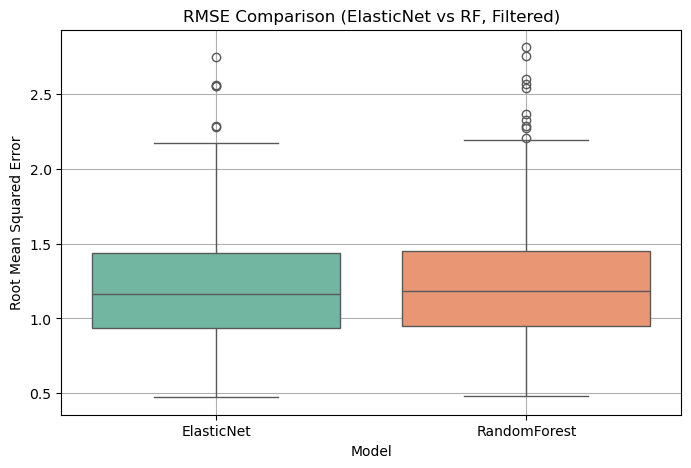

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x="Model", y="rmse_mean", hue="Model", legend=False, palette="Set2")
plt.title("RMSE Comparison (ElasticNet vs RF, Filtered)")
plt.ylabel("Root Mean Squared Error")
plt.grid(True)
plt.show()


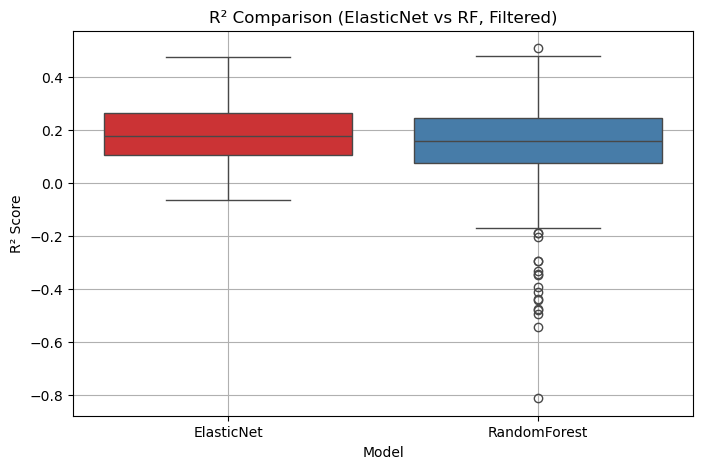

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x="Model", y="r2_mean", hue="Model", legend=False, palette="Set1")
plt.title("R² Comparison (ElasticNet vs RF, Filtered)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


### 📌 Summary Statistics (ElasticNet vs RandomForest)


In [6]:
filtered_df.groupby("Model")[["rmse_mean", "r2_mean"]].agg(["mean", "std", "median"]).round(4)


rmse_mean                 r2_mean                
                  mean     std  median    mean     std  median
Model                                                         
ElasticNet      1.2068  0.3645  1.1616  0.1879  0.1014  0.1766
RandomForest    1.2305  0.3751  1.1842  0.1510  0.1455  0.1605